# Happiness - Assignment 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('DataForTable2.1WHR2023.xls')

## Question 1

#### What is your evaluation of the quality of the data?

The data seems reasonably sufficient to draw some conclusions and answer questions regarding the happiness of a country. There are some missing values from the dataset, most notably in the column 'Perceptions of corruption' with 116 missing values, but 8 different columns in total have missing values. The data spans from 2005 to 2022. However, there are only 27 countries that are included in the 2005 data so the validity of the 2005 data is definitely questionable (and maybe even 2006 with 89 countries). It's interesting that there was (for the most part) a steady increase in country participation from 2005 onwards, but there has been a drop off since 2020 and I would guess COVID is a significant reason for this.

In [2]:
df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726
2195,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354
2196,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736
2197,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945,0.609917,0.241682


In [3]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2199.000000,2199.000000,2179.000000,2186.000000,2145.000000,2166.000000,2126.000000,2083.000000,2175.000000,2183.000000
mean,2014.161437,5.479226,9.389766,0.810679,63.294583,0.747858,0.000096,0.745195,0.652143,0.271501
std,4.718736,1.125529,1.153387,0.120952,6.901104,0.140150,0.161083,0.185837,0.105922,0.086875
min,2005.000000,1.281271,5.526723,0.228217,6.720000,0.257534,-0.337527,0.035198,0.178886,0.082737
25%,2010.000000,4.646750,8.499764,0.746609,59.119999,0.656528,-0.112116,0.688139,0.571684,0.207660
50%,2014.000000,5.432437,9.498955,0.835535,65.050003,0.769821,-0.022671,0.799654,0.663063,0.260671
75%,2018.000000,6.309460,10.373216,0.904792,68.500000,0.859382,0.092070,0.868827,0.737936,0.322894
max,2022.000000,8.018934,11.663788,0.987343,74.474998,0.985178,0.702708,0.983276,0.883586,0.704590


In [4]:
df.isna().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   20
Social support                       13
Healthy life expectancy at birth     54
Freedom to make life choices         33
Generosity                           73
Perceptions of corruption           116
Positive affect                      24
Negative affect                      16
dtype: int64

In [5]:
df.year.value_counts().sort_index()

year
2005     27
2006     89
2007    102
2008    110
2009    114
2010    124
2011    146
2012    141
2013    136
2014    144
2015    142
2016    141
2017    147
2018    141
2019    143
2020    116
2021    122
2022    114
Name: count, dtype: int64

In [6]:
df.loc[df.year == 2005, 'Country name'].unique()

array(['Australia', 'Belgium', 'Brazil', 'Canada', 'Czechia', 'Denmark',
       'Egypt', 'France', 'Germany', 'Greece', 'Hungary', 'Iran', 'Italy',
       'Japan', 'Jordan', 'Lebanon', 'Mexico', 'Netherlands', 'Pakistan',
       'Poland', 'Romania', 'Saudi Arabia', 'Spain', 'Sweden', 'Turkiye',
       'United Kingdom', 'Venezuela'], dtype=object)

#### How large is the data?
There are 2199 rows and 11 columns

#### What are the features and how are they represented?

There are 10 features and all of them are numeric except for the country name. Since the data is the aggregate for an entire country, I believe that every column except for year and name are averages of the data gathered for that year. I think that the columns 'Social support', 'Freedom to make life choices', 'Perceptions of corruption', 'Positive affect', and 'Negative affect' were either a binary response to a single question, or the average of multiple binary responses for multiple questions. For example from the appendix: 

> Social support (or having someone to count on in times of trouble) is the national average of the binary responses (either 0 or 1) to the GWP question "If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?"

The 'Generosity' column is also noteworthy because:

> Generosity is the residual of regressing national average of response to the GWP question "Have you donated money to a charity in the past month?" on GDP per capita.

This means that the values in the 'Generosity' column range from -1 to 1 and is the only column that has negative values.

Note: I referenced and made assumptions based off the information from https://happiness-report.s3.amazonaws.com/2023/WHR+23_Statistical_Appendix.pdf to answer this question.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2199 non-null   object 
 1   year                              2199 non-null   int64  
 2   Life Ladder                       2199 non-null   float64
 3   Log GDP per capita                2179 non-null   float64
 4   Social support                    2186 non-null   float64
 5   Healthy life expectancy at birth  2145 non-null   float64
 6   Freedom to make life choices      2166 non-null   float64
 7   Generosity                        2126 non-null   float64
 8   Perceptions of corruption         2083 non-null   float64
 9   Positive affect                   2175 non-null   float64
 10  Negative affect                   2183 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 189.1+ KB


#### Are there any interesting distributions in the (numeric) features?
All of the features are somewhat normally distributed but with slight skews. I was surprised how left skewed perceptions of corruption was, meaning the large majority of poll takers believe there is corruption in their country. One thing to note is that corruption in this data includes corruption in both government and businesses. However, there is no way to distinguish between the two in the data so some countries might have high perceived corruption in their government, while others may have high perceived corruption in their businesses, but we cannot tell which. Life ladder is normally distributed with a slight left skew so countries on average seem to be relatively happy.

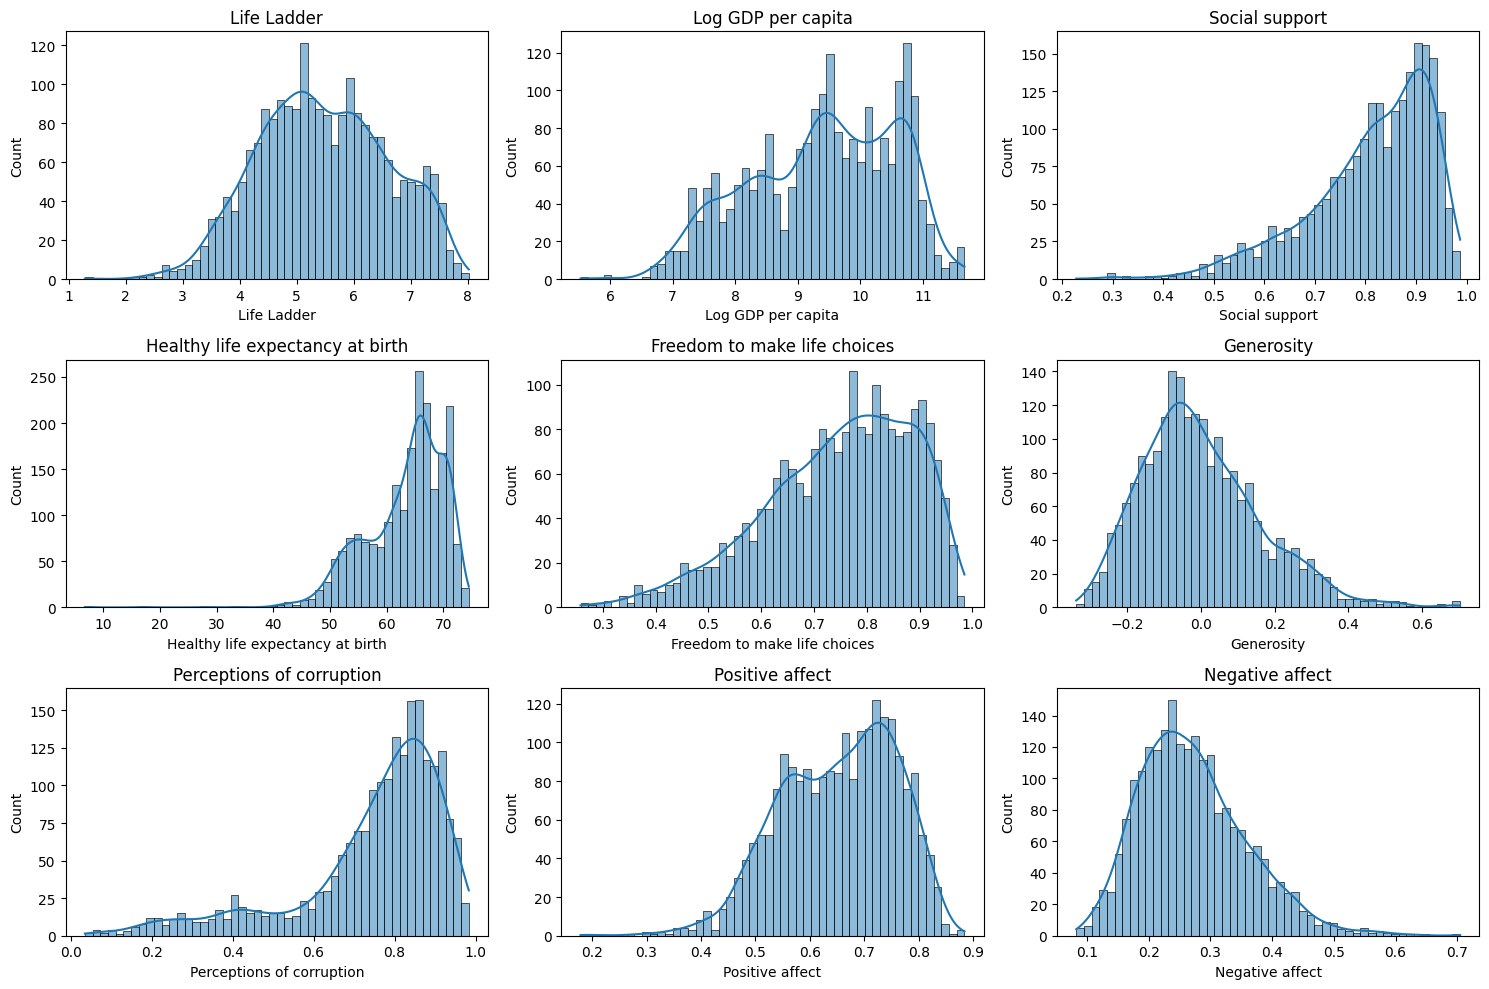

In [8]:
df_with_only_numeric = df.drop(['Country name', 'year'], axis=1)

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
for column, ax in zip(df_with_only_numeric, axs.flatten()):
    ax.set_title(column)
    sns.histplot(df[column], kde=True, bins=50, ax=ax)
    
plt.tight_layout()
plt.show()

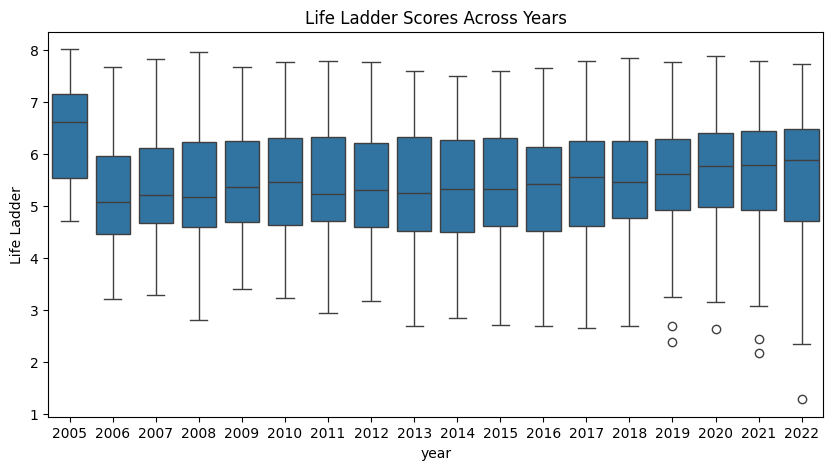

In [9]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='year', y='Life Ladder')
plt.title('Life Ladder Scores Across Years')
plt.show()

#### Are there any interesting correlations in the data?
Life ladder appears to be somewhat strongly correlated with Log GDP, social support and life expectancy at birth. Along with this, Log GDP and life expectancy have a high correlation which makes sense given that a country with a high GDP would most likely have better healthcare and nutrition services. Freedom to make life choices also appears to be correlated with life ladder, indicating that a person's freedom could be integral to their happiness.
Life ladder has the strongest negative correlation with perceptions of corruption, which indicates that a person's happiness could be affected by how fair and transparent they perceive their government or businesses are. Along with this, perceptions of corruption has a negative correlation with freedom to make life choices, which would make sense following the same reasoning.

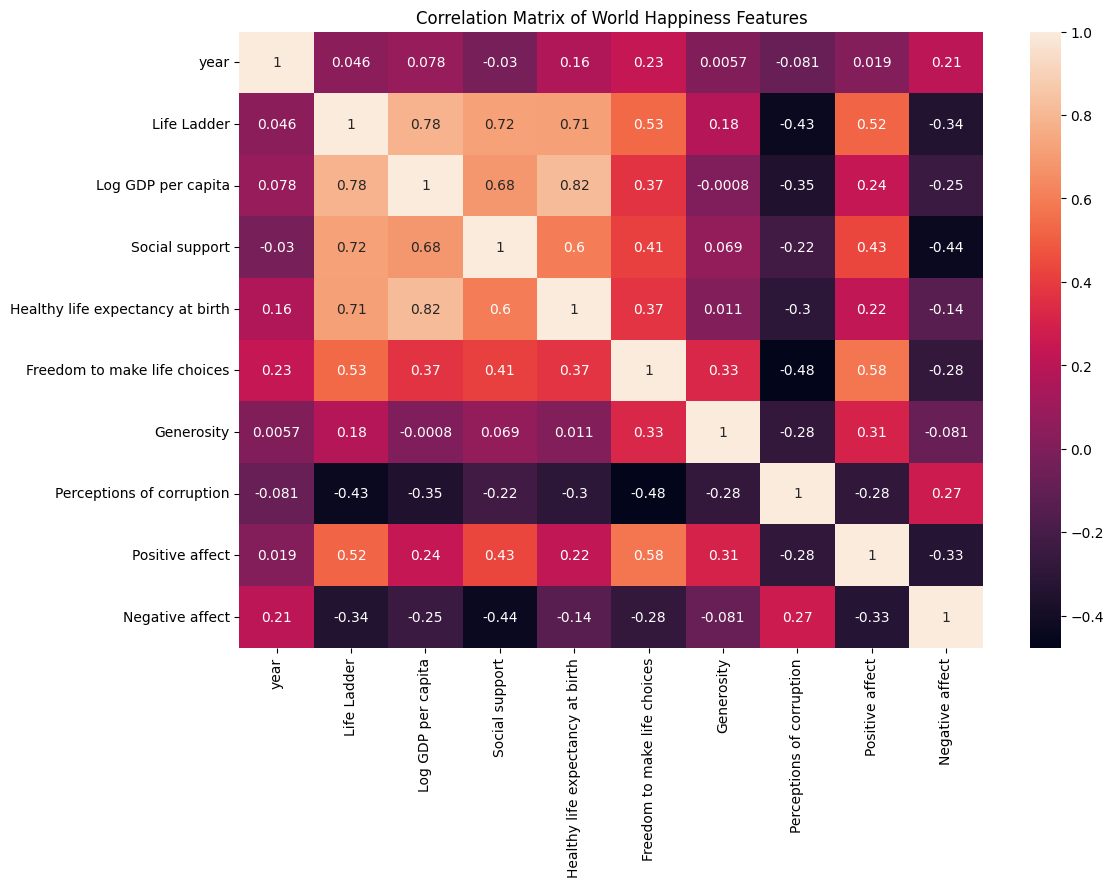

In [10]:
df_without_name = df.drop(['Country name'], axis=1)

plt.figure(figsize=(12, 8))
sns.heatmap(df_without_name.corr(), annot=True)

plt.title('Correlation Matrix of World Happiness Features')
plt.show()

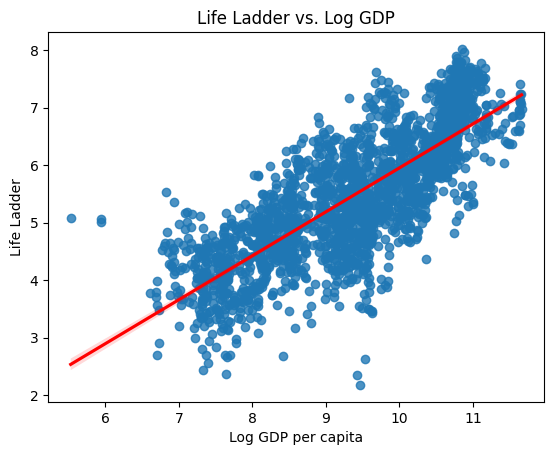

In [11]:
sns.regplot(data=df, x='Log GDP per capita', y='Life Ladder', line_kws={'color': 'red'})
plt.title('Life Ladder vs. Log GDP')
plt.show()

In [12]:
# Showing the outliers for the plot above
df[df['Log GDP per capita'] < 6]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
2132,Venezuela,2017,5.070751,5.943209,0.895879,64.750000,0.635505,0.054434,0.843969,0.697486,0.362985
2133,Venezuela,2018,5.005663,5.935122,0.886882,64.574997,0.610855,0.072312,0.827560,0.723260,0.373658
2134,Venezuela,2019,5.080803,5.526723,0.887672,64.400002,0.625526,0.128371,0.839340,0.729553,0.350950


I'm not sure if this is reporting error, but it seems pretty unlikely this data from 2017-2019 in Venezuela is accurate. All three outliers are from the same country and I don't know too much about Venezuela's politics/history but this was during a time of constitutional crisis and *significant* economic hardship. Because of this I find it kind of hard to believe that there would be such high levels of happiness in the country but this would definitely require more research/insight.

In [13]:
df.loc[(df['Log GDP per capita'] > 9) & (df['Life Ladder'] < 3)]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1115,Lebanon,2020,2.633753,9.531043,0.546600,66.074997,0.551601,-0.136191,0.883977,0.352249,0.481800
1116,Lebanon,2021,2.178809,9.470949,0.506775,66.150002,0.422697,-0.161281,0.905279,0.263487,0.569101
1117,Lebanon,2022,2.352428,9.428473,0.534528,66.224998,0.449575,-0.125514,0.882996,0.297508,0.429903


Lebanon 2020-2022 also are outliers, but this could potentially be explained with the explosions in Beirut and seems more likely to be accurate than the Venezuela data. However, this too could potentially require more research.

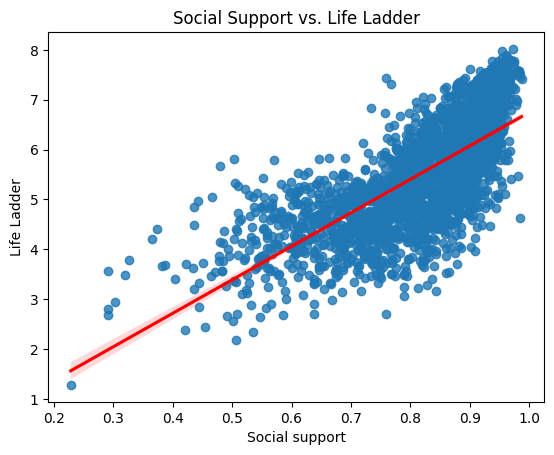

In [14]:
sns.regplot(data=df, x='Social support', y='Life Ladder', line_kws={'color': 'red'})
plt.title('Social Support vs. Life Ladder')
plt.show()

In [15]:
df.loc[(df['Life Ladder'] < 2) & (df['Social support'] < 0.3)]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
13,Afghanistan,2022,1.281271,NaN,0.228217,54.875,0.368377,NaN,0.733198,0.205868,0.575512


Afghanistan in 2022 is an extreme case but seems to follow the correlation pattern.

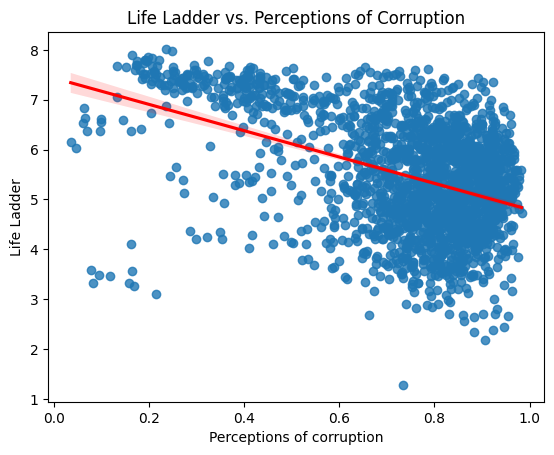

In [16]:
sns.regplot(data=df, x='Perceptions of corruption', y='Life Ladder', line_kws={'color': 'red'})
plt.title('Life Ladder vs. Perceptions of Corruption')
plt.show()

In [17]:
df.loc[(df['Life Ladder'] < 2) & (df['Perceptions of corruption'] < 0.8)]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
13,Afghanistan,2022,1.281271,NaN,0.228217,54.875,0.368377,NaN,0.733198,0.205868,0.575512


In [18]:
df.loc[(df['Life Ladder'] < 4.5) & (df['Perceptions of corruption'] < 0.3)]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1636,Rwanda,2006,4.214704,7.086945,0.717583,53.500000,0.915481,NaN,0.298644,0.700727,0.188996
1637,Rwanda,2008,4.362989,7.212564,0.485681,54.700001,0.752293,0.017989,0.286407,0.632626,0.220768
1639,Rwanda,2011,4.097436,7.342397,0.569860,56.500000,0.829036,-0.038137,0.161475,0.607516,0.154242
1640,Rwanda,2012,3.333048,7.400682,0.637147,57.099998,0.835491,-0.011333,0.081325,0.623918,0.132398
1641,Rwanda,2013,3.466388,7.423007,0.749633,57.700001,0.904272,-0.027295,0.117165,0.727640,0.167348
1642,Rwanda,2014,3.595678,7.459077,0.748304,58.299999,0.894025,-0.022424,0.078000,0.747769,0.133610
1643,Rwanda,2015,3.483109,7.520081,0.678144,58.900002,0.907892,0.025167,0.094604,0.691530,0.206403
1644,Rwanda,2016,3.332990,7.553644,0.665131,59.224998,0.910736,0.025161,0.158601,0.714600,0.285384
1645,Rwanda,2017,3.108374,7.567849,0.516550,59.549999,0.908115,0.051284,0.213757,0.724040,0.358310
1646,Rwanda,2018,3.561047,7.625810,0.616173,59.875000,0.924232,0.056681,0.163810,0.765132,0.308199


#### Can you identify any limitations, missing values or distortions of the data?/What would you like to see in this dataset?
I'm not entirely sure how Gallup conducts their surveys but there is no indication of how many people actually are being surveyed per country and per year. It would be very helpful to be able to see these numbers to assess the validity of the data.

For positive and negative affect, the survey seemed to (weirdly?) focus on their affects for yesterday in specific. For example from the index: 
> Positive affect is defined as the average of three positive affect measures in GWP: laugh, enjoyment and doing interesting things in the Gallup World Poll waves 3-7. These measures are the responses to the following three questions, respectively: “Did you smile or laugh a lot yesterday?”, and “Did you experience the following feelings during A LOT OF THE DAY yesterday? How about Enjoyment?”, “Did you learn or do something interesting yesterday?”

Because of this, I would guess the responses can vary widely from person to person and the reliability of the data should be regarded with caution.

Going off the thought above, all of this data is for an entire country but the variance of the answers within a country could potentially be extremely high. Along with this, all of the columns are responses to very basic binary questions. This means this data is maybe good for *very* general conclusions but is probably bad for more concrete/specific questions.

## Question 2

Note: This is the first paragraph in the appendix for the Happiness Report:
> Happiness score or subjective well-being (variable name ladder ): The survey measure of SWB is from the Jan 20, 2023 release of the Gallup World Poll (GWP) covering years from 2005 to 2022. Unless stated otherwise, it is the national average response to the question of life evaluations. The English wording of the question is “Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?” This measure is also referred to as Cantril life ladder, or just life ladder in our analysis.

The way I interpret this is that the 'Life Ladder' feature is the "happiness score" for a country so that is what I will be using to answer question 2/3.

#### What was happiest country in 2022?
Finland

In [19]:
df[df['year'] == 2022].sort_values(by='Life Ladder', ascending=False).head(1)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
637,Finland,2022,7.728998,10.814193,0.974395,71.224998,0.958609,0.102147,0.190207,0.741323,0.191473


#### What was the happiest country in 2013?
Canada

In [20]:
df[df['year'] == 2013].sort_values(by='Life Ladder', ascending=False).head(1)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
334,Canada,2013,7.593794,10.751601,0.936239,70.980003,0.916014,0.311748,0.406236,0.800634,0.26285


#### What was the happiest country of all time?
Denmark in 2005 was the happiest country of all time with a Life Ladder of over 8.

In [21]:
df.sort_values(by='Life Ladder', ascending=False).head(1)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
505,Denmark,2005,8.018934,10.849012,0.972372,68.300003,0.971135,NaN,0.236522,0.776689,0.153672


#### What was the least happy country in 2022?
Afghanistan

In [22]:
df[df['year'] == 2022].sort_values(by='Life Ladder', ascending=True).head(1)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
13,Afghanistan,2022,1.281271,NaN,0.228217,54.875,0.368377,NaN,0.733198,0.205868,0.575512


#### What was the least happy country in 2013?
Syria

In [23]:
df[df['year'] == 2013].sort_values(by='Life Ladder', ascending=True).head(1)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1883,Syria,2013,2.687553,8.418935,0.58545,59.82,0.454883,0.221555,0.663431,0.353619,0.62223


#### What was the least happy country of all time?
Afghanistan in 2022

In [24]:
df.sort_values(by='Life Ladder', ascending=True).head(1)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
13,Afghanistan,2022,1.281271,NaN,0.228217,54.875,0.368377,NaN,0.733198,0.205868,0.575512


## Question 3

#### Which country had the largest increase in happiness from its start of participation to 2022?
#### **Note: I changed the question to be from a country's start of participation to their last year of participation because not all countries have continued participation through 2022**
Congo (Brazzaville) had the largest increase in happiness which was about +1.99.

In [25]:
first_year_of_participation = df.groupby('Country name')[['Life Ladder', 'year']].first()
last_year_of_participation = df.groupby('Country name')[['Life Ladder', 'year']].last()

merged_df = first_year_of_participation.merge(last_year_of_participation, on='Country name')
merged_df['Change in Happiness'] = merged_df['Life Ladder_y'] - merged_df['Life Ladder_x']

merged_df.sort_values(by='Change in Happiness', ascending=False)

,Life Ladder_x,year_x,Life Ladder_y,year_y,Change in Happiness
Country name,,,,,
Congo (Brazzaville),3.819792,2008,5.804919,2022,1.985126
Nicaragua,4.460158,2006,6.392258,2022,1.932099
Georgia,3.675108,2006,5.292755,2022,1.617647
Bulgaria,3.843798,2007,5.378349,2022,1.534551
Serbia,4.750384,2007,6.245267,2021,1.494884
...,...,...,...,...,...
Angola,5.589001,2011,3.794838,2014,-1.794163
Syria,5.323332,2008,3.461913,2015,-1.861419
Jordan,6.294660,2005,4.355607,2022,-1.939054


#### Which country had the largest decrease in happiness?
Lebanon had the largest decrease which was about -3.14.

In [26]:
merged_df.sort_values(by='Change in Happiness', ascending=True)

,Life Ladder_x,year_x,Life Ladder_y,year_y,Change in Happiness
Country name,,,,,
Lebanon,5.491245,2005,2.352428,2022,-3.138818
Afghanistan,3.723590,2008,1.281271,2022,-2.442319
Jordan,6.294660,2005,4.355607,2022,-1.939054
Syria,5.323332,2008,3.461913,2015,-1.861419
Angola,5.589001,2011,3.794838,2014,-1.794163
...,...,...,...,...,...
Serbia,4.750384,2007,6.245267,2021,1.494884
Bulgaria,3.843798,2007,5.378349,2022,1.534551
Georgia,3.675108,2006,5.292755,2022,1.617647
